In [1]:
from fastbook import *
from fastai.tabular.all import *
from kaggle import api

In [23]:
path = URLs.path('bluebook')
path

Path('/Users/koichiro.mori/.fastai/archive/bluebook')

In [24]:
api.competition_download_cli('bluebook-for-bulldozers', path=path)
file_extract(path / 'bluebook-for-bulldozers.zip')

bluebook-for-bulldozers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
path.ls(file_type='text')

(#7) [Path('/Users/koichiro.mori/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/Valid.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/median_benchmark.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/Test.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/ValidSolution.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/Users/koichiro.mori/.fastai/archive/bluebook/TrainAndValid.csv')]

In [26]:
df = pd.read_csv(path / 'TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [28]:
# ordinal
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [29]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

In [30]:
df['ProductSize']

0            NaN
1         Medium
2            NaN
3          Small
4            NaN
           ...  
412693      Mini
412694      Mini
412695      Mini
412696      Mini
412697      Mini
Name: ProductSize, Length: 412698, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [31]:
dep_var = 'SalePrice'  # 予測対象の属性

In [32]:
df[dep_var] = np.log(df[dep_var])

In [33]:
df[dep_var]

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [34]:
df['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [35]:
# 日付から新しい属性（日付、曜日など）を生成する
df = add_datepart(df, 'saledate')
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,9.210340,1919201,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,3,10,7,2,67,False,False,False,False,False,False,1.331078e+09
412694,6333345,9.259131,1882122,21436,149,2.0,2005,NaN,NaN,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,N

In [36]:
df_test = pd.read_csv(path / 'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,18,3,3,124,False,False,False,False,False,False,1.336003e+09
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,19,10,3,131,False,False,False,False,False,False,1.336608e+09
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,5,19,10,3,131,False,False,False,False,False,False,1.336608e+09
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metric Tons",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,2012,5,19,10,3,131,False,False,False,False,False,False,1.336608e+09
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,19,10,3,131,False,False,False,False,False,False,1.336608e+09


In [37]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [38]:
procs = [Categorify, FillMissing]

In [39]:
cond = (df.saleYear < 2011) | (df.saleMonth < 10)
train_idx = np.where(cond)[0]
valid_idx = np.where(-cond)[0]

In [40]:
len(train_idx), len(valid_idx)

(404710, 7988)

In [41]:
splits = (list(train_idx), list(valid_idx))

In [42]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [43]:
cont

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleElapsed']

In [44]:
cat

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'saleIs_year_start']

In [45]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [46]:
to

        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246  11.097410     999089     3157         121           3.0   
1       1139248  10.950807     117657       77         121           3.0   
2       1139249   9.210340     434808     7009         121           3.0   
3       1139251  10.558414    1026470      332         121           3.0   
4       1139253   9.305651    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
401120  6333336   9.259130    1840702    21439         149           1.0   
401121  6333337   9.305651    1830472    21439         149           1.0   
401122  6333338   9.350102    1887659    21439         149           1.0   
401123  6333341   9.104980    1903570    21435         149           2.0   
401124  6333342   8.955448    1926965    21435         149           2.0   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  \
0           2004 

In [47]:
len(to.train), len(to.valid)

(404710, 7988)

In [48]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [49]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,529,57,98,0,3,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,1,1,1,1,1,1,1.077754e+09,1,1


In [50]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [51]:
save_pickle(path / 'to.pkl', to)

In [52]:
to = load_pickle(path / 'to.pkl')

In [53]:
xs, y = to.train.xs, to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
xs.shape, y.shape

((404710, 66), (404710,))

In [34]:
from sklearn.tree import DecisionTreeRegressor
# leafノードが4つになるまで分割する
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

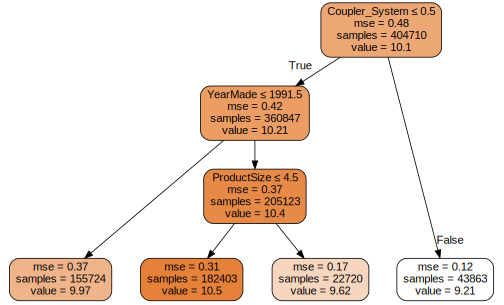

In [35]:
draw_tree(m, xs, size=7, leaves_parallel=True, precision=2)

In [36]:
samp_idx = np.random.permutation(len(y))[:500]
samp_idx.shape

(500,)

In [37]:
from dtreeviz.trees import *

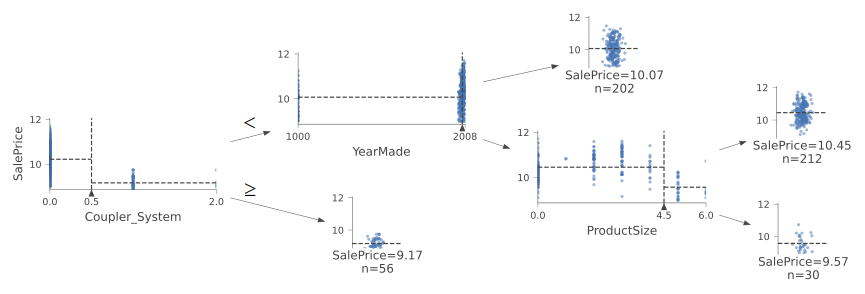

In [38]:
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR')

In [39]:
xs.loc[xs['YearMade'] < 1900, 'YearMade'] = 1950

In [40]:
valid_xs.loc[valid_xs['YearMade'] < 1900, 'YearMade'] = 1950

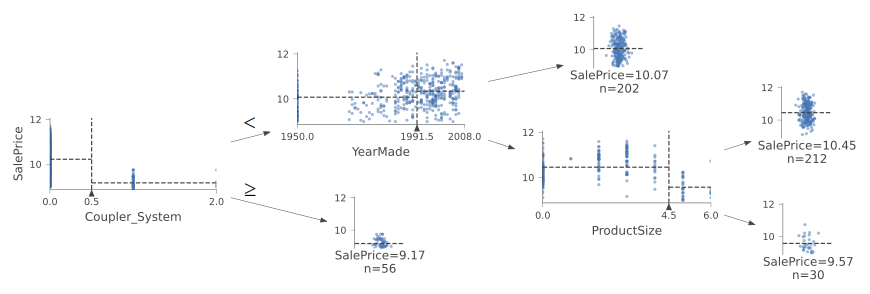

In [41]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR')

In [42]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [55]:
def r_mse(pred, y):
    return round(math.sqrt(((pred - y) ** 2).mean()), 6)

def m_rmse(m, xs, y):
    return r_mse(m.predict(xs), y)

In [44]:
m_rmse(m, xs, y)

0.0

In [45]:
m_rmse(m, valid_xs, valid_y)

0.334935

In [46]:
m.get_n_leaves(), len(xs)

(324560, 404710)

In [47]:
# leafノードのサンプル数が25個になるまで分割する
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)

DecisionTreeRegressor(min_samples_leaf=25)

In [48]:
m_rmse(m, xs, y)

0.248593

In [49]:
m_rmse(m, valid_xs, valid_y)

0.323339

In [50]:
m.get_n_leaves()

12397

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=200_000, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                 max_samples=max_samples, max_features=max_features,
                                 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [52]:
m = rf(xs, y)

In [53]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.170966, 0.232699)

In [54]:
len(m.estimators_)

40

In [55]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

(40, 7988)

In [56]:
preds.mean(0).shape

(7988,)

In [57]:
r_mse(preds.mean(0), valid_y)

0.232699

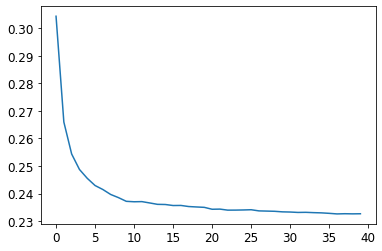

In [58]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [59]:
r_mse(m.oob_prediction_, y)

0.210776

## Model Interpretation

In [60]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

(40, 7988)

In [61]:
preds_std = preds.std(0)
preds_std.shape

(7988,)

In [62]:
preds_std[:5]

array([0.26069358, 0.10409366, 0.09904178, 0.27184634, 0.13110276])

In [67]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)

In [68]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.173023
6,ProductSize,0.117253
30,Coupler_System,0.117053
7,fiProductClassDesc,0.073112
54,ModelID,0.054777
65,saleElapsed,0.048835
3,fiSecondaryDesc,0.046104
31,Grouser_Tracks,0.041196
12,Enclosure,0.040495
32,Hydraulics_Flow,0.032725


In [69]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'bar', figsize=(12, 7), legend=False)

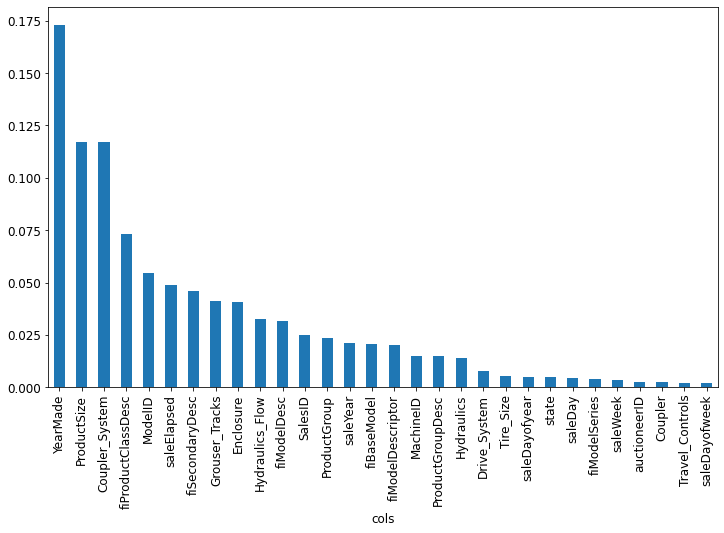

In [71]:
plot_fi(fi[:30]);

In [72]:
to_keep = fi[fi.imp > 0.005].cols
len(to_keep)

21

In [73]:
len(fi.cols)

66

In [74]:
to_keep

57              YearMade
6            ProductSize
30        Coupler_System
7     fiProductClassDesc
54               ModelID
65           saleElapsed
3        fiSecondaryDesc
31        Grouser_Tracks
12             Enclosure
32       Hydraulics_Flow
1            fiModelDesc
52               SalesID
9           ProductGroup
59              saleYear
2            fiBaseModel
5      fiModelDescriptor
53             MachineID
10      ProductGroupDesc
23            Hydraulics
11          Drive_System
28             Tire_Size
Name: cols, dtype: object

In [75]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [76]:
m = rf(xs_imp, y)

In [77]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.18131, 0.230503)

In [78]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

<AxesSubplot:xlabel='cols'>

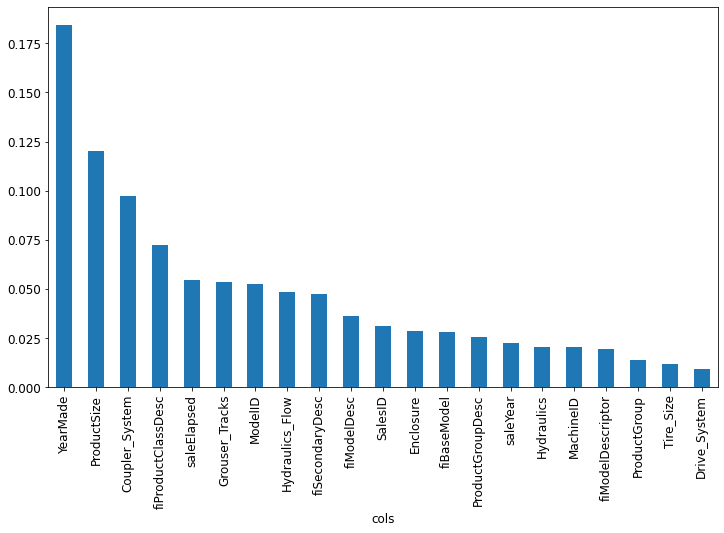

In [79]:
plot_fi(rf_feat_importance(m, xs_imp))

In [81]:
xs_imp.shape

(404710, 21)

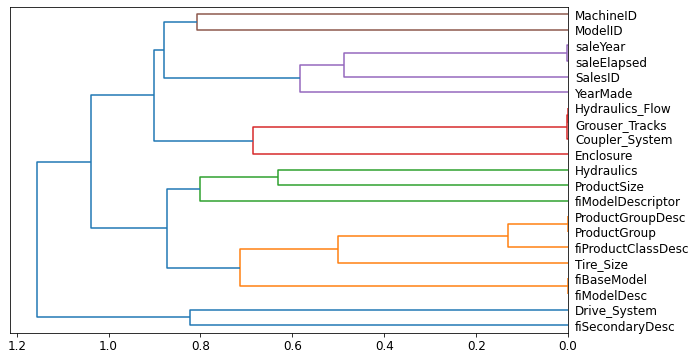

In [82]:
cluster_columns(xs_imp)

In [83]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15, max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [84]:
get_oob(xs_imp)

0.8781576734893485

In [85]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc', 'ProductGroup',
    'fiModelDesc', 'fiBaseModel', 'Hydraulics_Flow', 'Grouser_Tracks', 'Coupler_System'
)}

{'saleYear': 0.8768628311464004,
 'saleElapsed': 0.8722097904682757,
 'ProductGroupDesc': 0.8770087512874477,
 'ProductGroup': 0.8778594920344923,
 'fiModelDesc': 0.8754781084425128,
 'fiBaseModel': 0.8761168180455399,
 'Hydraulics_Flow': 0.8774995916903535,
 'Grouser_Tracks': 0.8775565092698138,
 'Coupler_System': 0.8770165273393064}

In [86]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8750482697068109

In [87]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

save_pickle(path / 'xs_final.pkl', xs_final)
save_pickle(path / 'valid_xs_final.pkl', valid_xs_final)

In [88]:
xs_final = load_pickle(path / 'xs_final.pkl')
valid_xs_final = load_pickle(path / 'valid_xs_final.pkl')

In [89]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183251, 0.232259)

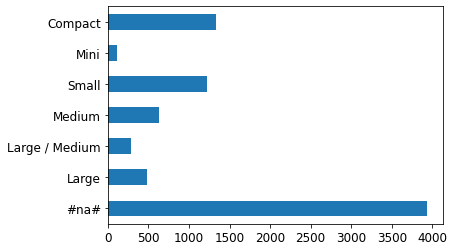

In [93]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

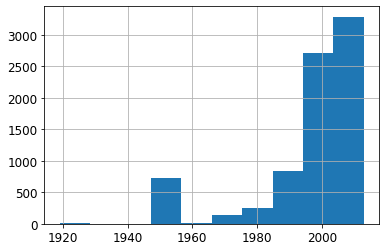

In [95]:
ax = valid_xs_final['YearMade'].hist()

In [ ]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(m, valid_xs_final, ['YearMade', 'ProductSize'], grid_resolution=20, ax=ax)

In [99]:
!pip install treeinterpreter

You should consider upgrading via the '/Users/koichiro.mori/fastbook/venv/bin/python -m pip install --upgrade pip' command.


In [100]:
!pip install waterfallcharts

Using legacy 'setup.py install' for waterfallcharts, since package 'wheel' is not installed.
    Running setup.py install for waterfallcharts ... done
You should consider upgrading via the '/Users/koichiro.mori/fastbook/venv/bin/python -m pip install --upgrade pip' command.


In [101]:
row = valid_xs_final.iloc[:5]
row

,YearMade,ProductSize,Coupler_System,fiProductClassDesc,ModelID,saleElapsed,fiSecondaryDesc,Enclosure,Hydraulics_Flow,fiModelDesc,SalesID,ProductGroup,fiModelDescriptor,MachineID,Hydraulics,Drive_System,Tire_Size
22915,1950,3,0,48,4124,1.317600e+09,43,1,0,2301,1218822,5,0,1024652,1,0,0
22916,2006,0,0,2,24808,1.317859e+09,50,6,0,278,1218823,1,17,1067601,0,2,0
22917,2006,0,2,41,9580,1.317859e+09,0,6,3,4514,1218824,3,0,1010582,4,0,0
22918,2003,0,2,44,6270,1.317859e+09,0,6,3,4213,1218825,3,0,1026609,4,0,0
22919,2007,0,0,1,17976,1.317859e+09,21,6,0,4647,1218826,1,0,1032638,0,2,0


In [105]:
from treeinterpreter import treeinterpreter

In [106]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [112]:
from waterfall_chart import plot as waterfall

<module 'matplotlib.pyplot' from '/Users/koichiro.mori/fastbook/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

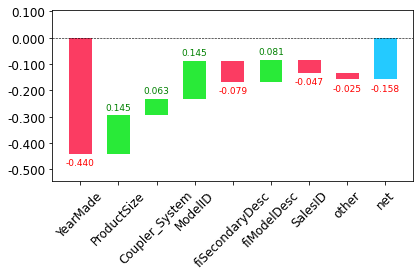

In [113]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, rotation_value=45, formatting='{:,.3f}')

## Extrapolation and Neural Networks

In [9]:
from sklearn.ensemble import RandomForestRegressor

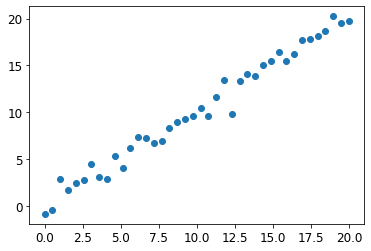

In [3]:
x_lin = torch.linspace(0, 20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [5]:
x_lin.shape, y_lin.shape

(torch.Size([40]), torch.Size([40]))

In [6]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape, xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [7]:
x_lin[:, None].shape

torch.Size([40, 1])

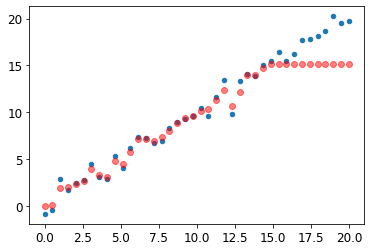

In [10]:
m_lin = RandomForestRegressor().fit(xs_lin[:30,], y_lin[:30])
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

In [12]:
path = URLs.path('bluebook')
xs_final = load_pickle(path / 'xs_final.pkl')
valid_xs_final = load_pickle(path / 'valid_xs_final.pkl')

In [14]:
df_dom = pd.concat([xs_final, valid_xs_final])
df_dom.head()

,YearMade,ProductSize,Coupler_System,fiProductClassDesc,ModelID,saleElapsed,fiSecondaryDesc,Enclosure,Hydraulics_Flow,fiModelDesc,SalesID,ProductGroup,fiModelDescriptor,MachineID,Hydraulics,Drive_System,Tire_Size
0,2004,0,0,59,3157,1.163635e+09,43,3,0,963,1139246,6,0,999089,1,0,17
1,1996,3,0,62,77,1.080259e+09,57,3,0,1745,1139248,6,0,117657,1,0,12
2,2001,0,1,39,7009,1.077754e+09,0,6,3,336,1139249,3,0,434808,4,0,0
3,2001,4,0,8,332,1.305763e+09,0,3,0,3716,1139251,4,0,1026470,1,0,0
4,2007,0,1,40,17311,1.248307e+09,0,1,3,4261,1139253,3,0,1057373,4,0,0


In [16]:
is_valid = np.array([0] * len(xs_final) + [1] * len(valid_xs_final))
is_valid

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
def rf(xs, y, n_estimators=40, max_samples=200_000, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                 max_samples=max_samples, max_features=max_features,
                                 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)

In [21]:
m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.895714
10,SalesID,0.078982
13,MachineID,0.022238
4,ModelID,0.000482
9,fiModelDesc,0.000429
0,YearMade,0.000370


In [56]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

orig 0.232146


In [57]:
for c in ('SalesID', 'saleElapsed', 'MachineID'):
    m = rf(xs_final.drop(c, axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c, axis=1), valid_y))

SalesID 0.230105
saleElapsed 0.234645
MachineID 0.231305


In [58]:
time_vars = ['SalesID', 'MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

In [59]:
m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229374

<AxesSubplot:>

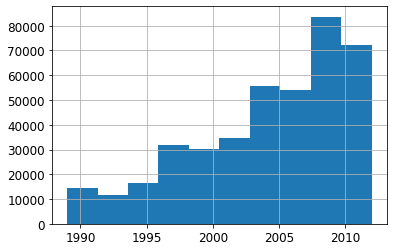

In [60]:
xs['saleYear'].hist()

In [62]:
filt = xs['saleYear'] > 2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177584, 0.229055)

## Using a Neural Network

In [64]:
df_nn = pd.read_csv(path / 'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [65]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [66]:
df_nn_final.head()

,YearMade,ProductSize,Coupler_System,fiProductClassDesc,ModelID,saleElapsed,fiSecondaryDesc,Enclosure,Hydraulics_Flow,fiModelDesc,ProductGroup,fiModelDescriptor,Hydraulics,Drive_System,Tire_Size,SalePrice
0,2004,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,3157,1.163635e+09,D,EROPS w AC,NaN,521D,WL,NaN,2 Valve,NaN,None or Unspecified,11.097410
1,1996,Medium,NaN,Wheel Loader - 150.0 to 175.0 Horsepower,77,1.080259e+09,F,EROPS w AC,NaN,950FII,WL,NaN,2 Valve,NaN,23.5,10.950807
2,2001,NaN,None or Unspecified,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,7009,1.077754e+09,NaN,OROPS,Standard,226,SSL,NaN,Auxiliary,NaN,NaN,9.210340
3,2001,Small,NaN,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",332,1.305763e+09,NaN,EROPS w AC,NaN,PC120-6E,TEX,NaN,2 Valve,NaN,NaN,10.558414
4,2007,NaN,None or Unspecified,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,17311,1.248307e+09,NaN,EROPS,Standard,S175,SSL,NaN,Auxiliary,NaN,NaN,9.305651


In [67]:
dep_var

'SalePrice'

In [72]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [73]:
cont_nn

['saleElapsed']

In [74]:
cat_nn

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'ModelID',
 'fiSecondaryDesc',
 'Enclosure',
 'Hydraulics_Flow',
 'fiModelDesc',
 'ProductGroup',
 'fiModelDescriptor',
 'Hydraulics',
 'Drive_System',
 'Tire_Size']

In [77]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
Enclosure                6
Hydraulics_Flow          3
fiModelDesc           5059
ProductGroup             6
fiModelDescriptor      140
Hydraulics              12
Drive_System             4
Tire_Size               17
dtype: int64

In [79]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.176793, 0.229525)

In [80]:
cat_nn.remove('fiModelDescriptor')

In [83]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, splits=splits, y_names=dep_var)

In [89]:
to_nn

        YearMade  ProductSize  Coupler_System  fiProductClassDesc  ModelID  \
0             63            0               0                  59      646   
1             55            3               0                  62       11   
2             60            0               1                  39     1543   
3             60            4               0                   8      111   
4             66            0               1                  40     3552   
...          ...          ...             ...                 ...      ...   
401120        64            5               0                  17     4068   
401121        64            5               0                  17     4068   
401122        64            5               0                  17     4068   
401123        64            5               0                  13     4064   
401124        64            5               0                  13     4064   

        saleElapsed  fiSecondaryDesc  Enclosure  Hydraulics_Flo

In [91]:
dls = to_nn.dataloaders(1024)
dls.show_batch()

,YearMade,ProductSize,Coupler_System,fiProductClassDesc,ModelID,fiSecondaryDesc,Enclosure,Hydraulics_Flow,fiModelDesc,ProductGroup,Hydraulics,Drive_System,Tire_Size,saleElapsed,SalePrice
0,1974,Medium,#na#,Wheel Loader - 150.0 to 175.0 Horsepower,7277,#na#,EROPS,#na#,950,WL,2 Valve,#na#,20.5,9.700128e+08,9.825526
1,2004,Medium,#na#,Wheel Loader - 200.0 to 225.0 Horsepower,5866,E,OROPS,#na#,L120E,WL,2 Valve,#na#,None or Unspecified,1.331770e+09,11.289782
2,1994,Mini,#na#,"Hydraulic Excavator, Track - 4.0 to 6.0 Metric Tons",10908,#na#,EROPS,#na#,TB045,TEX,Auxiliary,#na#,#na#,1.056499e+09,9.104980
3,2004,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,3170,K,OROPS,#na#,580K,BL,#na#,Two Wheel Drive,#na#,1.301530e+09,10.308952
4,1983,Large / Medium,#na#,"Hydraulic Excavator, Track - 24.0 to 28.0 Metric Tons",7008,#na#,EROPS,#na#,225,TEX,Standard,#na#,#na#,6.022944e+08,10.915089
5,2000,#na#,None or Unspecified,Skid Steer Loader - 1751.0 to 2201.0 Lb Operating Capacity,3261,XT,OROPS,Standard,90XT,SSL,Auxiliary,#na#,#na#,1.311725e+09,9.047821
6,2005,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,3542,D,OROPS,#na#,420D,BL,#na#,Four Wheel Drive,#na#,1.248307e+09,10.221941
7,2003,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,4605,G,OROPS,#na#,310G,BL,#na#,Two Wheel Drive,#na#,1.228781e+09,9.928180
8,2008,Compact,#na#,Wheel Loader - 80.0 to 90.0 Horsepower,26454,#na#,EROPS,#na#,L190,WL,2 Valve,#na#,None or Unspecified,1.335139e+09,9.975808
9,1000,Large / Medium,#na#,"Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons",14132,LC,EROPS,#na#,DH220LC,TEX,Standard,#na#,#na#,9.273312e+08,10.584056


In [93]:
y = to_nn.train.y
y.min(), y.max()

(8.465899, 11.863583)

In [94]:
from fastai.tabular.all import *

In [95]:
learn = tabular_learner(dls, y_range=(8, 12), layers=[500, 250], n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.00019054606673307717)

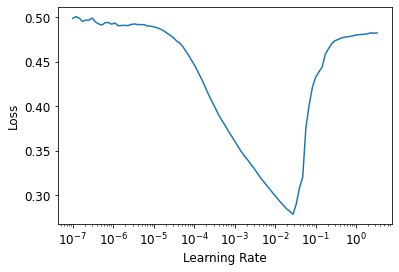

In [96]:
learn.lr_find()

In [97]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.068834,0.061146,00:33
1,0.056382,0.056920,00:34
2,0.048620,0.054935,00:34
3,0.043639,0.052352,00:34
4,0.040285,0.051167,00:34


In [98]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.226201

In [99]:
learn.save('nn')

Path('models/nn.pth')

In [100]:
rf_preds = m.predict(valid_xs_time)
rf_preds.shape

(7988,)

In [101]:
preds.shape

torch.Size([7988, 1])

In [102]:
ens_preds = (to_np(preds.squeeze()) + rf_preds) / 2

In [103]:
r_mse(ens_preds, valid_y)

0.222181